# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [85]:
import pandas as pd
import numpy as np
# import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split  

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    RocCurveDisplay
)
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import ComplementNB, MultinomialNB

In [73]:
email_data = pd.read_csv('data/spam_or_not_spam.csv')
email_data.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [74]:
# рассчитайте частоты для классов
email_data["label"].value_counts()

0    2500
1     500
Name: label, dtype: int64

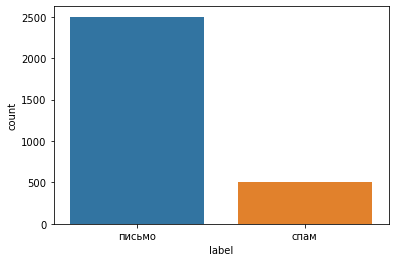

In [75]:
# визуализируйте результат:
ax = sns.countplot(x=email_data["label"])
ax.set_xticklabels(["письмо", "спам"])
plt.show()

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [76]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [77]:
# email_data = email_data.fillna(np.nan)
# data = email_data.dropna()
# data.isnull().sum()
data = email_data.replace(r"^\s*$", np.NaN, regex=True).dropna()

Переводим данные в векторный вид:

In [79]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [80]:
print('Размер матрицы после перевода в векторный вид:', X.shape)

Размер матрицы после перевода в векторный вид: (2997, 34116)


## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [81]:
y = data["label"]

Разделите выборку на обучающую и тестовую, размер тестовой выборки возьмите как 0.25, параметр random_state определите со значением 42:

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [83]:
y_test.mean()

0.16533333333333333

## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [90]:
clf = ComplementNB(alpha=0.01)
clf.fit(X_train, y_train)

mlf = MultinomialNB(alpha=0.01)
mlf.fit(X_train, y_train)

MultinomialNB(alpha=0.01)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [92]:
y_pred = clf.predict(X_test)
y_pred_m = mlf.predict(X_test)
print('----- ComplementNB  -------------')
print(f"Accuracy clf: {accuracy_score(y_test, y_pred)}")
print(f"Precision clf: {precision_score(y_test, y_pred)}")
print(f"Recall clf: {recall_score(y_test, y_pred)}")
print(f"F-1 score clf: {f1_score(y_test, y_pred)}")

print("")
print('----- MultinomialNB  -------------')
print(f"Accuracy mlf: {accuracy_score(y_test, y_pred)}")
print(f"Precision mlf: {precision_score(y_test, y_pred)}")
print(f"Recall mlf: {recall_score(y_test, y_pred)}")
print(f"F-1 score mlf: {f1_score(y_test, y_pred)}")

----- ComplementNB  -------------
Accuracy clf: 0.988
Precision clf: 1.0
Recall clf: 0.9274193548387096
F-1 score clf: 0.9623430962343097

----- MultinomialNB  -------------
Accuracy mlf: 0.988
Precision mlf: 1.0
Recall mlf: 0.9274193548387096
F-1 score mlf: 0.9623430962343097


Нарисуйте ROC-кривую:

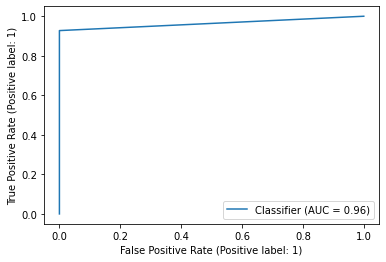

In [93]:
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [94]:
param_grid = {
    "alpha": [1, 0.1, 0.01, 0.001, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]
}

cv = GridSearchCV(clf, param_grid, scoring="accuracy", n_jobs=-1)
cv.fit(X_train, y_train)
cv.best_params_


{'alpha': 1}

In [95]:
y_pred = cv.best_estimator_.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F-1 score: {f1_score(y_test, y_pred)}")

Accuracy: 0.9933333333333333
Precision: 0.9917355371900827
Recall: 0.967741935483871
F-1 score: 0.979591836734694
